## import libaries

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## import dataset 

In [29]:
spam_df = pd.read_csv('spam_ham_dataset.csv')
spam_df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [30]:
spam_df = spam_df.drop(['Unnamed: 0','label'],axis=1)
spam_df.head(10)

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
5,Subject: ehronline web address change\r\nthis ...,0
6,Subject: spring savings certificate - take 30 ...,0
7,Subject: looking for medication ? we ` re the ...,1
8,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [31]:
spam_df.tail(10)

,text,label_num
5161,Subject: penny stocks are about timing\r\nnoma...,1
5162,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5163,Subject: re : meter # : 1266 ; august 2000 / a...,0
5164,Subject: slutty milf wants to meet you\r\ntake...,1
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0
5170,Subject: important online banking alert\r\ndea...,1


In [32]:
spam_df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [33]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


## Visualize dataset

In [34]:
spam_df = spam_df.rename(columns={'label_num':'spam'})
spam_df

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [35]:
ham = spam_df[spam_df['spam']==0]
ham.head(10)

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,Subject: re : indian springs\r\nthis deal is t...,0
5,Subject: ehronline web address change\r\nthis ...,0
6,Subject: spring savings certificate - take 30 ...,0
8,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,"Subject: nominations for oct . 21 - 23 , 2000\...",0
12,"Subject: enron / hpl actuals for august 28 , 2...",0
14,Subject: tenaska iv july\r\ndarren :\r\nplease...,0


In [36]:
spam = spam_df[spam_df['spam']==1]
spam.head(10)

,text,spam
3,"Subject: photoshop , windows , office . cheap ...",1
7,Subject: looking for medication ? we ` re the ...,1
10,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,Subject: report 01405 !\r\nwffur attion brom e...,1
13,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1
15,Subject: underpriced issue with high return on...,1
24,Subject: jump in to gain substantial ground im...,1
35,Subject: end of year clearance\r\nitem no #\r\...,1
40,"Subject: vlc , 0 dln for sale , no prior pres ...",1
41,Subject: jennifer\r\nsends them to their final...,1


In [37]:
print('Spam Percentage =',len(spam)/len(spam_df)*100,"%")
print('Ham Percentage =',len(ham)/len(spam_df)*100,"%")


Spam Percentage = 28.98859021465867 %
Ham Percentage = 71.01140978534133 %


<Axes: xlabel='spam', ylabel='count'>

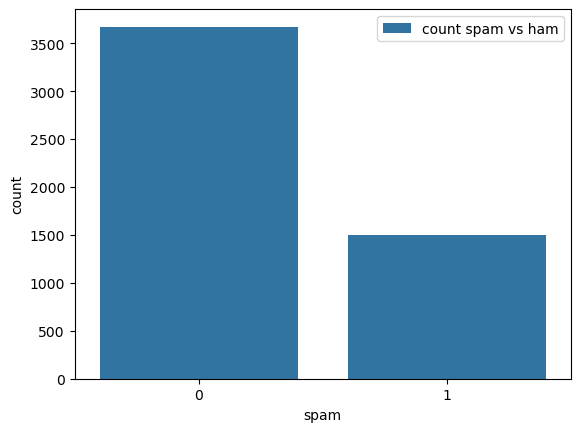

In [41]:
sns.countplot(x=spam_df['spam'],label='count spam vs ham')

In [39]:
spam_df['spam'].value_counts()

0    3672
1    1499
Name: spam, dtype: int64

## count vectorizer 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['spam'])


In [46]:
vectorizer.get_feature_names_out()

array(['spam', 'text'], dtype=object)